<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/3-backtesting/backtesting4_yfinance_ta_2330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 台積電如何買？用 Python 研發投資策略
https://www.finlab.tw/twii-2330-invest/

In [1]:
# 等它安裝完成
!pip install yfinance > log.txt
!pip install Backtesting==0.2.0 > log.txt


In [ ]:
#!pip install talib

In [ ]:
#!pip install ta-lib-bin

In [ ]:
#!pip install finlab

In [2]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=46ee81f2f2ebdca6f4719515a9f5707a255073c2d9eb073fb5aa3db5624ccd82
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


## Pandas TA 一个能帮助你迅速计算技术指标的神器
https://zhuanlan.zhihu.com/p/539435373
Pandas TA 是一个基于Pandas模块开发的，具有上百个技术指标和常用指标的开源模块。它包括但不限于能够绘制62种蜡烛形态（晨星、乌云、十字星、孕线等等）、130个技术指标，如移动平均线、macd、hma、布林带、obv、aron、squeeze等等各种指标。
.
支持以下全部技术指标：

aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, uo, variance, vhf, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, xsignals, zscore

In [3]:
import pandas_ta as ta

In [4]:
import yfinance as yf
import pandas as pd

def get_historical_data(ticker):
  d = yf.Ticker(ticker)
  df = d.history(period="max")
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data('2330.TW')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2000-01-04 00:00:00+08:00,35.203030,35.203030,34.609725,35.203030,200662336736,0.0,0.0
2000-01-05 00:00:00+08:00,35.203035,35.994045,34.807435,35.994045,402466805912,0.0,0.0
2000-01-06 00:00:00+08:00,35.796335,35.994040,35.203030,35.203030,197545715802,0.0,0.0
2000-01-07 00:00:00+08:00,34.016425,34.609730,33.620825,34.214130,235270344752,0.0,0.0
2000-01-10 00:00:00+08:00,35.203036,35.598447,34.609731,35.400742,276171685539,0.0,0.0


In [5]:
print(df.ta.log_return(cumulative=True, append=True))

Date
2000-01-04 00:00:00+08:00    0.000000
2000-01-05 00:00:00+08:00    0.022221
2000-01-06 00:00:00+08:00    0.000000
2000-01-07 00:00:00+08:00   -0.028493
2000-01-10 00:00:00+08:00    0.005601
                               ...   
2023-05-08 00:00:00+08:00    2.661444
2023-05-09 00:00:00+08:00    2.673279
2023-05-10 00:00:00+08:00    2.659458
2023-05-11 00:00:00+08:00    2.651474
2023-05-12 00:00:00+08:00    2.645444
Name: CUMLOGRET_1, Length: 5825, dtype: float64


In [ ]:
# update numpy
#!pip install -U numpy

In [ ]:
#import numpy as np

In [ ]:
#from finlab import data
#data.indicator('RSI', timeperiod=14)

In [ ]:
#from finlab import data

#values = data.indicator('supertrend')

In [6]:
sma10 = df.ta.sma(length=10)
print(sma10)

Date
2000-01-04 00:00:00+08:00       NaN
2000-01-05 00:00:00+08:00       NaN
2000-01-06 00:00:00+08:00       NaN
2000-01-07 00:00:00+08:00       NaN
2000-01-10 00:00:00+08:00       NaN
                              ...  
2023-05-08 00:00:00+08:00    499.10
2023-05-09 00:00:00+08:00    499.40
2023-05-10 00:00:00+08:00    499.90
2023-05-11 00:00:00+08:00    500.65
2023-05-12 00:00:00+08:00    500.90
Name: SMA_10, Length: 5825, dtype: float64


<Axes: >

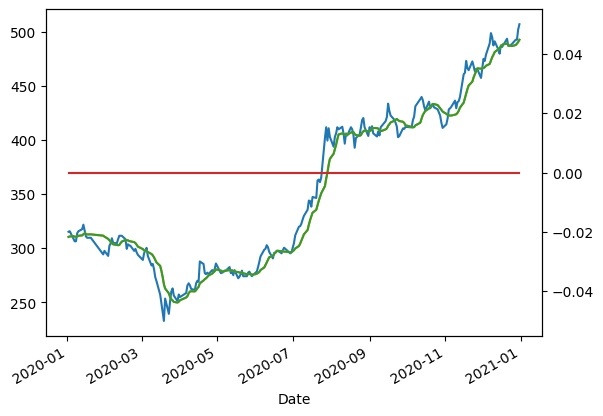

In [8]:
#import talib

# compute simple moving average using talib
sma1 = ta.sma(df.Close, timeperiod=20)
sma2 = ta.sma(df.Close, timeperiod=60)

# compute buy and sell signals (golden cross and death cross)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

# combine long and short signals
signal = signal_long.copy()
signal[signal_short] = -1

# plot
df.Close['2020'].plot()
sma1['2020'].plot()
sma2['2020'].plot()
signal['2020'].astype(int).plot(secondary_y=True)

In [9]:
from backtesting import Backtest, Strategy

class Strategy(Strategy):
    
    n1 = 20
    n2 = 60
    
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close = pd.Series(self.data.Close)
        sma1 = ta.sma(close, timeperiod=self.n1)
        sma2 = ta.sma(close, timeperiod=self.n2)

        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

        # combine signal
        signal = signal_long
        signal[signal_short] = -1
        
        # plot sma
        self.I(lambda x: sma1, 'sma1')
        self.I(lambda x: sma2, 'sma2')

        # set signal to trade
        self.signal = self.I(lambda x: signal, 'signal')

    def next(self):
        super().next()

        entry_size = self.signal[-1]

        if entry_size > 0:
            self.buy()
        elif entry_size < 0:
          for trade in self.trades:
              trade.close()

bt = Backtest(df, Strategy)
result1 = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:44: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:992: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version. check index.inferred_type instead.
  if (not data.index.is_all_dates and
/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:1007: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  if len(data.columns & {'Open', 'High', 'Low', 'Close', 'Volume'}) != 5:


In [10]:
result2 = bt.optimize(n1=range(5, 200, 10),
                      n2=range(5, 200, 10))
result2._strategy

<ipython-input-10-dea20e7a91a8>:1: UserWarning: Searching for best of 400 configurations.
  result2 = bt.optimize(n1=range(5, 200, 10),


  0%|          | 0/2 [00:00<?, ?it/s]

<Strategy Strategy(n1=5,n2=5)>

<Axes: >

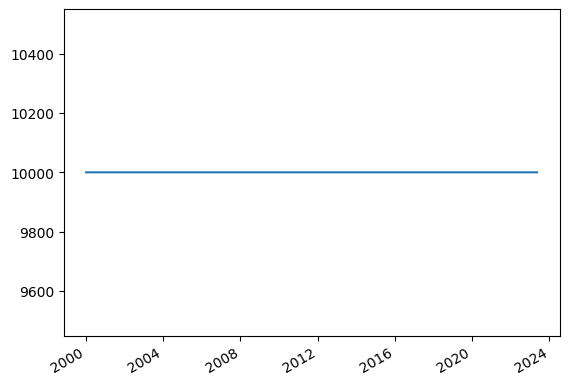

In [11]:
((result1._equity_curve.Equity + result2._equity_curve.Equity)/2).plot()